<h3>Importing Libs</h3>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

<h3> Loading Data </h3>

In [2]:
dataset_path = os.path.join('loan', 'loan.csv')
df = pd.read_csv(dataset_path)
df.head()

C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<h3>Dataset size</h3>

In [3]:
df.shape

(39717, 111)

<h3> Checking Null Values Count On Each Columns</h3>

In [4]:
null_counts = df.isnull().sum()

null_counts

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

<h3>Removing All Columns which are completly Null</h3>

In [5]:
df = df.dropna(axis=1, how='all')
df.shape

(39717, 57)

<font color='red'>Out of 111 Columns, 54 Columns contains only null value</font><br>
<font color='red'>Removed 54 Columns Now we have 57 Columns left to Analysis</font>

<h4>Now Analysing Null Value Count of Remaning Columns</h4>

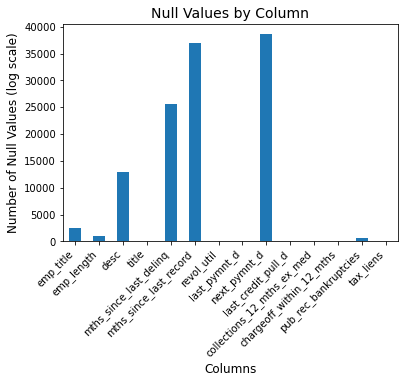

<Figure size 864x576 with 0 Axes>

In [6]:
# Count the null values in each column
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
# Create a bar plot
null_counts.plot(kind='bar')

# Customize the plot
plt.title('Null Values by Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Null Values (log scale)', fontsize=12)  # Update the y-label text
plt.xticks(rotation=45, ha='right', fontsize=10)

# Increase the size of the plot window
plt.figure(figsize=(12, 8))

# Display the plot
plt.tight_layout()
plt.show()

<h3>Removing below Columns as it not possible to fix Missing Values</h3>
    <br>
<b><font color="Blue">mths_since_last_delinq</font>&nbsp;</b> {The number of months since the borrower's last delinquency.} <br>
<b><font color="Blue">mths_since_last_record</font>&nbsp;</b> {The number of months since the last public record.}<br>
<b><font color="Blue">next_pymnt_d</font>&nbsp;</b>	{Next scheduled payment date}<br>

Also Removing <b><font color="Blue">desc</font>&nbsp;</b> as it can't be standardised<br>
<b><font color="Blue">desc</font>&nbsp;</b>	{Loan description provided by the borrower}<br>

In [7]:
columns_to_drop = ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'desc']
df = df.drop(columns=columns_to_drop)
df.shape

(39717, 53)

<h6><font color='red'>Removed 4 columns now we left with 53 Columns</font></h6>

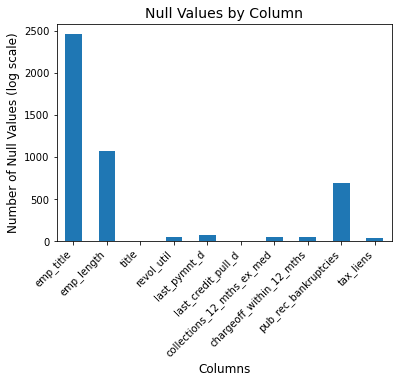

<Figure size 864x576 with 0 Axes>

In [8]:
# Count the null values in each column
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
# Create a bar plot
null_counts.plot(kind='bar')

# Customize the plot
plt.title('Null Values by Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Null Values (log scale)', fontsize=12)  # Update the y-label text
plt.xticks(rotation=45, ha='right', fontsize=10)

# Increase the size of the plot window
plt.figure(figsize=(12, 8))

# Display the plot
plt.tight_layout()
plt.show()

In [9]:
df.columns


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [12]:
#Droping Some Useless Columns
useless_columns = ['id', 'member_id', 'emp_title', 'url', 'zip_code',
                   'policy_code', 'application_type', 'chargeoff_within_12_mths',
                  'emp_title', 'pymnt_plan']
df = df.drop(columns=useless_columns)
df.shape

(39717, 44)

In [13]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [16]:
#Check Missing Values in Rows
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
39712    3
39713    3
39714    3
39715    3
39716    3
Length: 39717, dtype: int64

In [21]:
set(df['emp_length'])

{'1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 nan}

In [23]:
#In emp_length there are nan values present, filling 'nan' with 0
df['emp_length'] = df['emp_length'].fillna(0)
set(df['emp_length'])

{0,
 '1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year'}

In [24]:
set(df['home_ownership'])

{'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'}

In [30]:
#Remove Records which have None
df = df[df['home_ownership']!='NONE']
set(df['home_ownership'])

{'MORTGAGE', 'OTHER', 'OWN', 'RENT'}

In [31]:
df.shape


(39714, 44)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39714 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39714 non-null  int64  
 1   funded_amnt                 39714 non-null  int64  
 2   funded_amnt_inv             39714 non-null  float64
 3   term                        39714 non-null  object 
 4   int_rate                    39714 non-null  object 
 5   installment                 39714 non-null  float64
 6   grade                       39714 non-null  object 
 7   sub_grade                   39714 non-null  object 
 8   emp_length                  39714 non-null  object 
 9   home_ownership              39714 non-null  object 
 10  annual_inc                  39714 non-null  float64
 11  verification_status         39714 non-null  object 
 12  issue_d                     39714 non-null  object 
 13  loan_status                 397

In [45]:
df= df[~df['revol_util'].isnull()]

In [46]:
df['revol_util'].isnull().count()

39664

In [47]:
df['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [48]:
df['revol_util'] = df['revol_util'].str.rstrip('%')

In [49]:
df['revol_util'].head()

0    83.70
1     9.40
2    98.50
3       21
4    53.90
Name: revol_util, dtype: object

In [60]:
def revol_util_categgories_func(x):
    value = float(x)
    if value>=75:
        return 'Extremly Risky'
    elif value>=50:
        return 'Risky'
    elif value>=25:
        return 'Moderate'
    elif value>=10:
        return 'Good'
    return 'Extremly Good'

In [61]:
df['revol_util_categgories'] = df['revol_util'].apply(lambda x: revol_util_categgories_func(x))

In [66]:
df.groupby('revol_util_categgories').count()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
revol_util_categgories,,,,,,,,,,,,,,,,,,,,,
Extremly Good,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,...,4485,4485,4479,4485,4484,4473,4485,4485,4351,4477
Extremly Risky,8884,8884,8884,8884,8884,8884,8884,8884,8884,8884,...,8884,8884,8866,8884,8883,8879,8884,8884,8764,8881
Good,5259,5259,5259,5259,5259,5259,5259,5259,5259,5259,...,5259,5259,5251,5259,5259,5243,5259,5259,5168,5245
Moderate,10392,10392,10392,10392,10392,10392,10392,10392,10392,10392,...,10392,10392,10369,10392,10392,10378,10392,10392,10194,10384
Risky,10644,10644,10644,10644,10644,10644,10644,10644,10644,10644,...,10644,10644,10632,10644,10644,10637,10644,10644,10493,10640
